## 36118: Applied Natural Language Processing (ANLP)

### AT2 Part B

### Group 27: HD Innovators

## Lyrics Cleaning and Preparation


Contents:

1. Load the data

2. Explore the data

3. Tokenize the lyrics text

4. Remove punctuations

5. Remove stopwords

6. Lemmatization

7. Topic Modelling

In [63]:
# Import packages
# Python packages
import pandas as pd
import string

# NLTK packages
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk import BigramAssocMeasures
from nltk.collocations import * 
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')

# Packages related to topic modelling
import gensim
import pyLDAvis
from gensim.models import CoherenceModel
import pyLDAvis.gensim_models as gensimvis
from textblob import TextBlob
from wordcloud import WordCloud


# Data visualisation
import seaborn as sns
import matplotlib.pyplot as plt

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/monalipatil/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/monalipatil/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/monalipatil/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### 1. Load the data

In [64]:
# Import data.
df_lyrics = pd.read_csv('/Users/monalipatil/ANLP/AT2/data/data_filtered.csv')

### 2. Explore the data

In [65]:
# Check summary information.
df_lyrics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11978 entries, 0 to 11977
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    11978 non-null  int64  
 1   artist_name   11978 non-null  object 
 2   track_name    11978 non-null  object 
 3   release_date  11978 non-null  int64  
 4   genre         11978 non-null  object 
 5   lyrics        11978 non-null  object 
 6   len           11978 non-null  int64  
 7   valence       11978 non-null  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 748.8+ KB


In [66]:
# Describe summary statistics.
df_lyrics.describe()

,Unnamed: 0,release_date,len,valence
count,11978.000000,11978.000000,11978.000000,11978.000000
mean,16153.030473,1994.581232,106.949324,0.568380
std,7169.281975,17.132621,37.214055,0.245457
min,5.000000,1950.000000,56.000000,0.000000
25%,10682.500000,1982.000000,76.000000,0.375515
50%,17074.000000,1996.000000,98.000000,0.586768
75%,22211.750000,2010.000000,130.000000,0.767879
max,27467.000000,2019.000000,199.000000,1.000000


In [67]:
# Describe summary statistics for all datatype.
df_lyrics.describe(include='all')

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,valence
count,11978.000000,11978,11978,11978.000000,11978,11978,11978.000000,11978.000000
unique,NaN,3622,10981,NaN,6,11978,NaN,NaN
top,NaN,ella fitzgerald,fever,NaN,blues,cold chamber smoke kush gettin higher plane sw...,NaN,NaN
freq,NaN,49,11,NaN,2000,1,NaN,NaN
mean,16153.030473,NaN,NaN,1994.581232,NaN,NaN,106.949324,0.568380
std,7169.281975,NaN,NaN,17.132621,NaN,NaN,37.214055,0.245457
min,5.000000,NaN,NaN,1950.000000,NaN,NaN,56.000000,0.000000
25%,10682.500000,NaN,NaN,1982.000000,NaN,NaN,76.000000,0.375515
50%,17074.000000,NaN,NaN,1996.000000,NaN,NaN,98.000000,0.586768
75%,22211.750000,NaN,NaN,2010.000000,NaN,NaN,130.000000,0.767879


In [68]:
# Check columns.
df_lyrics.columns

Index(['Unnamed: 0', 'artist_name', 'track_name', 'release_date', 'genre',
       'lyrics', 'len', 'valence'],
      dtype='object')

In [69]:
# Check if any missing values.
for column in df_lyrics.columns:
    print(column, df_lyrics[column].isnull().sum())

Unnamed: 0 0
artist_name 0
track_name 0
release_date 0
genre 0
lyrics 0
len 0
valence 0


In [70]:
# Check first few rows. 
df_lyrics.head()

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,valence
0,13923,santana,wham!,1978,blues,cold chamber smoke kush gettin higher plane sw...,198,0.857791
1,14958,marvin sease,show me what you got,1991,blues,public service announcement weezy baby best ra...,198,0.794930
2,15045,the robert cray band,1040 blues,1993,blues,gotta rapper today forget fuck smokin brain ce...,198,0.613561
3,15691,carl sims,it's just a party,2004,blues,girls knock ghetto ballin real thugs unngghhhh...,198,0.705276
4,16322,rufus thomas,sixty minute man,2011,blues,diddle devil yabba double walk feel body feel ...,198,0.651690


### 3. Tokenize

In [71]:
# Convert all data of lyrics to string type.
df_lyrics['lyrics'] = df_lyrics['lyrics'].apply(str)

# Convert all string of lyrics to lowercase.
df_lyrics['lyrics'] = df_lyrics['lyrics'].str.lower()

# Tokenize text from lyrics. 
df_lyrics['tokenized'] = df_lyrics['lyrics'].apply(word_tokenize)

### 4. Remove Punctuations

In [72]:
# Remove punctuations.
punc_marks = list(string.punctuation)
df_lyrics['tokenized'] = df_lyrics['tokenized'].apply(lambda x: [word for word in x if word not in punc_marks])
                                                                       
# Display smaple data. 
df_lyrics.sample(10)

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,valence,tokenized
7049,1584,tommy james,draggin' the line,1971,pop,makin livin hard takin givin snow rain bright ...,128,0.769167,"[makin, livin, hard, takin, givin, snow, rain,..."
6806,6568,the weeknd,the hills,2015,pop,yeah yeah yeah road doin promo say business lo...,142,0.117890,"[yeah, yeah, yeah, road, doin, promo, say, bus..."
1917,14704,rory gallagher,i ain't no saint,1987,blues,saint turn cheek saint cool temper word speak ...,63,0.874279,"[saint, turn, cheek, saint, cool, temper, word..."
3576,10153,nick lowe,all men are liars,1990,country,liars word wear tire girls bring pliers pull t...,74,0.930956,"[liars, word, wear, tire, girls, bring, pliers..."
8495,21854,bounty killer,can't beat we,1994,reggae,block crips school blood eses eses wrong color...,147,0.820692,"[block, crips, school, blood, eses, eses, wron..."
2208,8369,commander cody and his lost planet airmen,"beat me daddy, eight to the bar",1971,country,little honkytonky village texas play best pian...,137,0.883553,"[little, honkytonky, village, texas, play, bes..."
1752,16284,tab benoit,broke and lonely,2011,blues,lose money lose mind yeah lose money lose mind...,67,0.794930,"[lose, money, lose, mind, yeah, lose, money, l..."
7679,21,ghantasala,avanee nee pathi,1952,pop,feel take moment feel force veiny point tear h...,104,0.420857,"[feel, take, moment, feel, force, veiny, point..."
6882,6867,post malone,blame it on me,2018,pop,free people wanna takin piece away need hold d...,137,0.302350,"[free, people, wan, na, takin, piece, away, ne..."
8456,22696,konshens,so high,2009,reggae,babylon burn burn burn sojah represent dream w...,151,0.843364,"[babylon, burn, burn, burn, sojah, represent, ..."


### 5. Remove Stopwords

In [73]:
# Use stopwords to remove stop words.
stopwords = nltk.corpus.stopwords.words('english')

# Add personalised list of stop words.
stopwords.extend(["'m", "'s", "'d", "hi", "im", "wa", "n't", "'get", "'ll", "'re", "'ve", "get", "still", "mmm", "ooh", "oooh", "yah", "yeh","mmm", "hmm"])

# Remove the stop words from the dataset. 
df_lyrics['cleaned_stopwords'] = df_lyrics['tokenized'].apply(lambda x: [word for word in x if word not in stopwords])

# Check first few rows. 
df_lyrics.head(3)

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,valence,tokenized,cleaned_stopwords
0,13923,santana,wham!,1978,blues,cold chamber smoke kush gettin higher plane sw...,198,0.857791,"[cold, chamber, smoke, kush, gettin, higher, p...","[cold, chamber, smoke, kush, gettin, higher, p..."
1,14958,marvin sease,show me what you got,1991,blues,public service announcement weezy baby best ra...,198,0.794930,"[public, service, announcement, weezy, baby, b...","[public, service, announcement, weezy, baby, b..."
2,15045,the robert cray band,1040 blues,1993,blues,gotta rapper today forget fuck smokin brain ce...,198,0.613561,"[got, ta, rapper, today, forget, fuck, smokin,...","[got, ta, rapper, today, forget, fuck, smokin,..."


### 6. Lemmatization

In [74]:
# Function to attain part of speech of words.
def determine_wordnet_speech(word_tag):
    if word_tag.startswith('J'):
        return wordnet.ADJ
    elif word_tag.startswith('V'):
        return wordnet.VERB
    elif word_tag.startswith('N'):
        return wordnet.NOUN
    elif word_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
# Add part of speech tags.
df_lyrics['pos_tags'] = df_lyrics['cleaned_stopwords'].apply(nltk.tag.pos_tag)

# Function to get part of speech in WordNet format.
df_lyrics['pos_tags'] = df_lyrics['pos_tags'].apply(lambda x: [(word, determine_wordnet_speech(pos_tag)) for (word, pos_tag) in x])

# Lemmatize words.
word_lemmatizer = WordNetLemmatizer()
df_lyrics['lyrics_lemmatized'] = df_lyrics['pos_tags'].apply(lambda x: [word_lemmatizer.lemmatize(word, tag) for word, tag in x])

# Convert list to string datatype. 
df_lyrics['lyrics_lemmatized'] = [' '.join(map(str,l)) for l in df_lyrics['lyrics_lemmatized']]

# Check few rows.
df_lyrics.head(3)

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,valence,tokenized,cleaned_stopwords,pos_tags,lyrics_lemmatized
0,13923,santana,wham!,1978,blues,cold chamber smoke kush gettin higher plane sw...,198,0.857791,"[cold, chamber, smoke, kush, gettin, higher, p...","[cold, chamber, smoke, kush, gettin, higher, p...","[(cold, a), (chamber, n), (smoke, v), (kush, n...",cold chamber smoke kush gettin high plane swan...
1,14958,marvin sease,show me what you got,1991,blues,public service announcement weezy baby best ra...,198,0.794930,"[public, service, announcement, weezy, baby, b...","[public, service, announcement, weezy, baby, b...","[(public, a), (service, n), (announcement, n),...",public service announcement weezy baby best ra...
2,15045,the robert cray band,1040 blues,1993,blues,gotta rapper today forget fuck smokin brain ce...,198,0.613561,"[got, ta, rapper, today, forget, fuck, smokin,...","[got, ta, rapper, today, forget, fuck, smokin,...","[(got, v), (ta, a), (rapper, n), (today, n), (...",get ta rapper today forget fuck smokin brain c...


Lyrics Length

<Axes: >

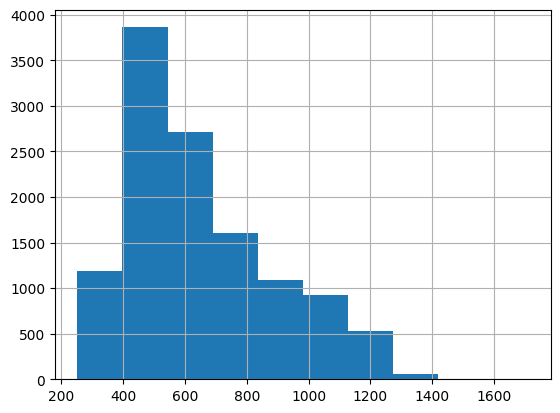

In [75]:
# Check the total characters in each lyrics.
df_lyrics['lyrics_lemmatized'].str.len().hist()

<Axes: >

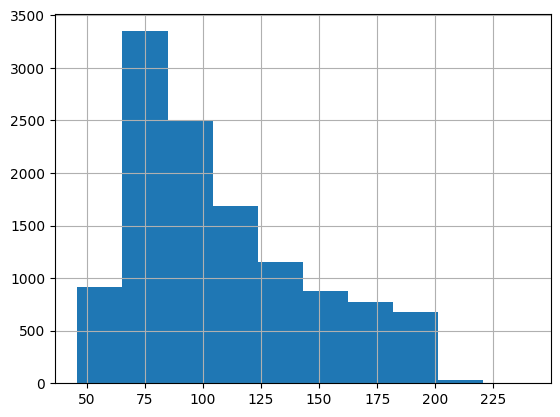

In [76]:
# Check total words in each lyrics. 
df_lyrics['lyrics_lemmatized'].str.split().map(lambda x: len(x)).hist()

Word Frequency

/usr/local/lib/python3.10/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)
/usr/local/lib/python3.10/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/usr/local/lib/python3.10/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/usr/local/lib/python3.10/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or

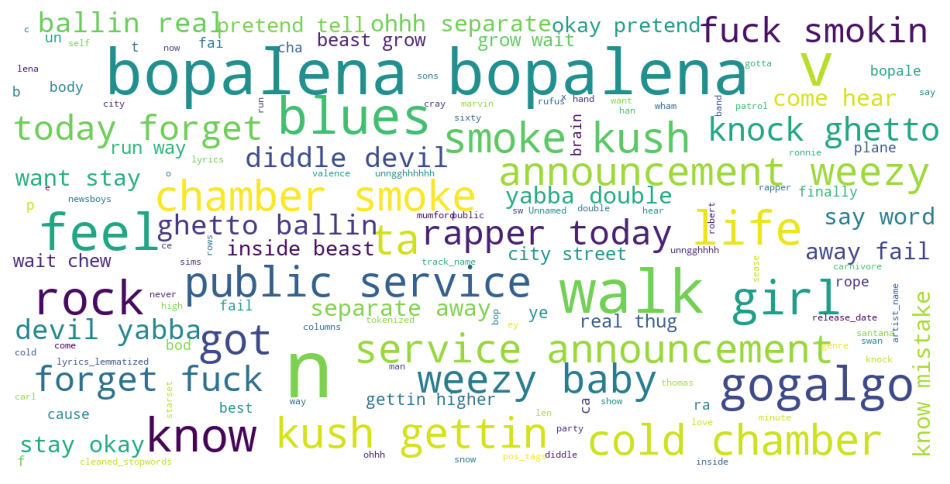

In [77]:
# Generate wordcloud.
wordcloud = WordCloud(scale=3, max_words=150, random_state=1, max_font_size=35, background_color='white')
wordcloud=wordcloud.generate(str(df_lyrics))

# Display wordcloud.
fig = plt.figure(1, figsize=(12, 12))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

Word Associations

In [78]:
# Check top 10 words associations. 
bigram_measures = BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(df_lyrics['lyrics_lemmatized'])
finder.nbest(bigram_measures.likelihood_ratio, 10)

[('aaaaaaaaaaah yeah fall chaos star depth pain darkness suffer move place inside understand bleed capture spirit death loosen grip protect hell burn inside hell hell bring light darkness awaken stir reveal true intention hell free free hell lead darkness strengthen protect voice make sound suffer bleed pull hell free free protect hell burn inside hell free hell hell',
  'hard build well nation different race everyday wake newly face godly daily erase night horrible trace talk talk talk sweet nation fight power brotherly easier write story longer hour brotherly brotherly sisterly take miracle heritage talk talk talk sweet nation fight power brotherly easier write story longer hour brotherly brotherly sisterly take miracle heritage talk talk talk sweet'),
 ('aaaaahaaaaa pretty head worry comin home hurry see swingin girl satisfy comin comin comin comin know get ta hurry baby comin comin comin comin right little girl hear cryin say love think liar know love kiss touch thrill comin comin 

Sentiments Polarity and Sentiments Analysis

<Axes: >

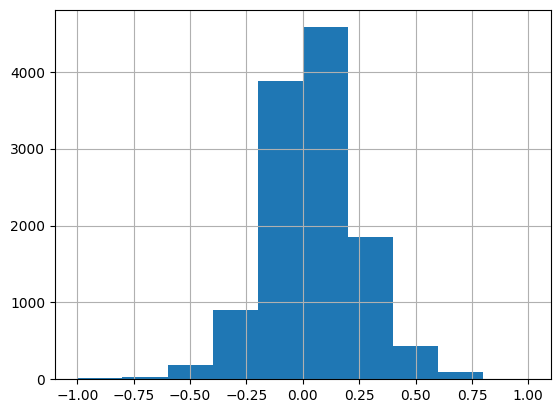

In [79]:
# Check popular sentiments of lyrics.
df_lyrics['polarity_score'] = df_lyrics['lyrics_lemmatized'].apply(lambda x : TextBlob(x).sentiment.polarity)

# Display histogram of the sentiments polarity of lyrics.
df_lyrics['polarity_score'].hist()

<Axes: ylabel='sentiments_score1'>

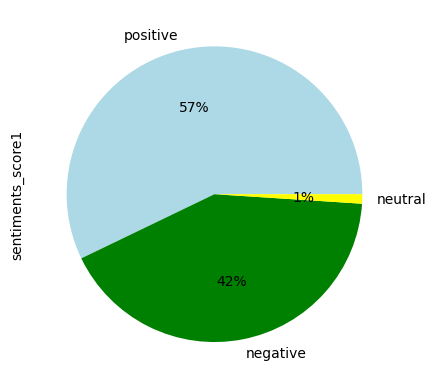

In [80]:
# Define function to classify lyrics into negative, positive, or neutral group.
def sentiment_analysis(word):
    if word<0:
        return 'negative'
    elif word==0:
        return 'neutral'
    else:
        return 'positive'

# 1.Classify the sentiment score of lyrics.
df_lyrics['sentiments_score1']= df_lyrics['polarity_score'].map(lambda word: sentiment_analysis(word))

# 2. Classify the sentiment score of lyrics.
df_lyrics['sentiments_score2']= df_lyrics['lyrics_lemmatized'].map(lambda x: TextBlob(x).sentiment.subjectivity)

# Display chart of the sentiments score of lyrics.
df_lyrics.sentiments_score1.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["lightblue", "green", "yellow"])

<Axes: ylabel='sentiments_score1'>

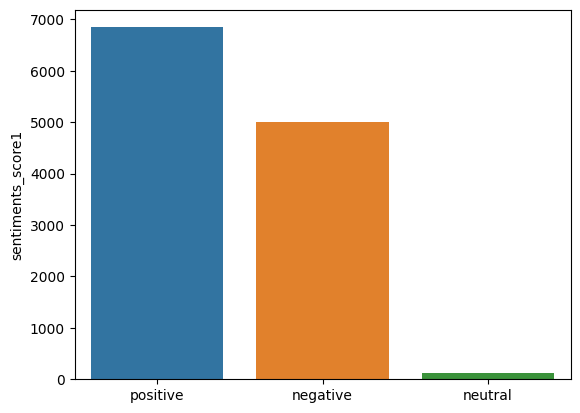

In [81]:
# Display bar graph of the sentiments score of lyrics.
sns.barplot(x=df_lyrics.sentiments_score1.value_counts().index, y=df_lyrics.sentiments_score1.value_counts() , data=df_lyrics)

In [82]:
# Check some positive lyrics. 
df_lyrics[df_lyrics['sentiments_score1']=='positive']['lyrics_lemmatized'].head()

0    cold chamber smoke kush gettin high plane swan...
1    public service announcement weezy baby best ra...
3    girl knock ghetto ballin real thug unngghhhhhh...
5    tell tell comin hell comin drink pour light st...
6    door money kilt niggas round uhhhhh donkey pil...
Name: lyrics_lemmatized, dtype: object

In [83]:
# Check some negative lyrics. 
df_lyrics[df_lyrics['sentiments_score1']=='negative']['lyrics_lemmatized'].head()

2     get ta rapper today forget fuck smokin brain c...
4     diddle devil yabba double walk feel body feel ...
8     tuck flow wine taste type flow high class hell...
10    mama say life hard grow day black girl scar co...
11    phase people think little crazy angle occasion...
Name: lyrics_lemmatized, dtype: object

In [84]:
df_lyrics.dtypes

Unnamed: 0             int64
artist_name           object
track_name            object
release_date           int64
genre                 object
lyrics                object
len                    int64
valence              float64
tokenized             object
cleaned_stopwords     object
pos_tags              object
lyrics_lemmatized     object
polarity_score       float64
sentiments_score1     object
sentiments_score2    float64
dtype: object

### 7. Topic  Modelling

In [85]:
# Topic modelling for lyrics. 
dictionary = gensim.corpora.Dictionary(df_lyrics['cleaned_stopwords'])
corpus = [dictionary.doc2bow(lyr_text) for lyr_text in df_lyrics['cleaned_stopwords']]
lda = gensim.models.LdaMulticore(corpus = corpus, id2word = dictionary, num_topics = 10, passes = 10, random_state=100, per_word_topics=True)
lda.show_topics()
pyLDAvis.enable_notebook()
topic_display = gensimvis.prepare(lda, corpus, dictionary)
topic_display

/usr/local/lib/python3.10/site-packages/pyLDAvis/_prepare.py:244: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.069397 -0.007559       1        1  14.338998
8     -0.063866 -0.047917       2        1  14.333186
6      0.126047 -0.034676       3        1  13.945772
2      0.052201 -0.014651       4        1  10.901409
1     -0.072586  0.008863       5        1   9.518211
9      0.051374  0.006908       6        1   9.462574
4     -0.032999  0.012672       7        1   7.891528
7      0.034312 -0.051603       8        1   7.089552
5     -0.042131 -0.031207       9        1   6.408969
0      0.017046  0.159170      10        1   6.109800, topic_info=       Term         Freq         Total Category  logprob  loglift
84    night  6763.000000   6763.000000  Default  30.0000  30.0000
591   heart  7151.000000   7151.000000  Default  29.0000  29.0000
479    away  8696.000000   8696.000000  Default  28.0000  28.0000
999   break  5395.000000   5395.000000  Default  27.0000  27.0000
54       go  9247.000000   9247.000000  Default  26.0000  26.0000
..      ...          ...           ...      ...      ...      ...
211      na   376.373571  11683.124624  Topic10  -5.3442  -0.6400
136    time   381.718566  15133.103057  Topic10  -5.3301  -0.8847
262   world   335.908684   5731.892499  Topic10  -5.4579  -0.0417
527  people   300.603944   3192.629121  Topic10  -5.5690   0.4325
521   leave   314.078783   6585.461519  Topic10  -5.5251  -0.2477

[888 rows x 6 columns], token_table=       Topic      Freq             Term
term                                   
8460       2  0.937464       aaaaaaaaah
26397      2  0.939263  aaaahhhhaaahhhh
11233      1  0.013622         accustom
11233      3  0.953559         accustom
29872      1  0.058300        advertise
...      ...       ...              ...
12431      5  0.047686             zion
12431      6  0.005961             zion
12431      7  0.071529             zion
12431     10  0.077490             zion
26492      9  0.958171            zomby

[3483 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 9, 7, 3, 2, 10, 5, 8, 6, 1])

In [86]:
# Check topic coherence score (Higher coherence scores indicate more distinct topics.)
lyrics_text = [['heart', 'long', 'baby', 'think', 'need']]
coherence_model = CoherenceModel(model=lda, texts=lyrics_text, coherence='c_v')
coherence_score = coherence_model.get_coherence()
print(coherence_score)

/usr/local/lib/python3.10/site-packages/gensim/topic_coherence/direct_confirmation_measure.py:204: RuntimeWarning: divide by zero encountered in double_scalars
  m_lr_i = np.log(numerator / denominator)
/usr/local/lib/python3.10/site-packages/gensim/topic_coherence/indirect_confirmation_measure.py:323: RuntimeWarning: invalid value encountered in double_scalars
  return cv1.T.dot(cv2)[0, 0] / (_magnitude(cv1) * _magnitude(cv2))


nan


In [87]:
df_lyrics.head(3)

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,valence,tokenized,cleaned_stopwords,pos_tags,lyrics_lemmatized,polarity_score,sentiments_score1,sentiments_score2
0,13923,santana,wham!,1978,blues,cold chamber smoke kush gettin higher plane sw...,198,0.857791,"[cold, chamber, smoke, kush, gettin, higher, p...","[cold, chamber, smoke, kush, gettin, higher, p...","[(cold, a), (chamber, n), (smoke, v), (kush, n...",cold chamber smoke kush gettin high plane swan...,0.132139,positive,0.649412
1,14958,marvin sease,show me what you got,1991,blues,public service announcement weezy baby best ra...,198,0.794930,"[public, service, announcement, weezy, baby, b...","[public, service, announcement, weezy, baby, b...","[(public, a), (service, n), (announcement, n),...",public service announcement weezy baby best ra...,0.185142,positive,0.593548
2,15045,the robert cray band,1040 blues,1993,blues,gotta rapper today forget fuck smokin brain ce...,198,0.613561,"[got, ta, rapper, today, forget, fuck, smokin,...","[got, ta, rapper, today, forget, fuck, smokin,...","[(got, v), (ta, a), (rapper, n), (today, n), (...",get ta rapper today forget fuck smokin brain c...,-0.191667,negative,0.466667
